In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
def remove_par(df, feat):
    df[feat] = df[feat].str.replace('(','')
    df[feat] = df[feat].str.replace(')','')
    
def string2int(df, feat):
    df[feat] = df[feat].astype(int)
    
def polish_trade_feature(df, feat):
    remove_par(df, feat)
    string2int(df, feat)

In [15]:
# correct the name of the country to facilitate the merge betwen sambanis and geodata
dic_country_conv = dict({
    "Northern Alliance (Afghanistan)*":"Afghanistan",
    "South Vietnam":"Republic of Vietnam",
    'UAE':'United Arab Emirates',
    'UNITA (Angola)*':'Angola',
    'DR Congo':'Democratic Republic of the Congo',
    'United States':'United States of America',
    'Iran (Islamic Republic of)':'Iran',
    'Cote d’Ivoire':'Ivory Coast',
    "Lao People's Democratic Republic":'Laos',
    "Moldova (the Republic of)":'Moldova',
    'Viet Nam':'Republic of Vietnam',
    'Russian Federation':'Russia',
    'Korea (the Republic of)':'South Korea',
    'Eswatini':'Swaziland',
    'Syrian Arab Republic':'Syria',
    'Taiwan (Province of China)':'Taiwan',
    'Tanzania (the United Republic of)':'Tanzania',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    
    "Yemen People's Republic":'Yemen',
    'Yemen Arab Republic':'Yemen',
    '???':'Czechoslovakia',
    "???":'Yugoslavia',
    "???":'Zanzibar',
    "???":'Kosovo',
    "???":'Macedonia'
})
#left a space between the countries that required manual handling

#update the name of the countries in the geodata to allow a merge
#geodata["country_name"].replace(to_replace=dic_country_conv, inplace=True)
#geodata["country_border_name"].replace(to_replace=dic_country_conv, inplace=True)

In [3]:
trade = pd.read_csv("trade_reg.csv",sep='\t')

cols_sambanis = ["warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4",
        "autonomy", "avgnabo", "centpol3", "cowcode", "coldwar", "decade1", "decade2",
        "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel",
        "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590",
        "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2",
        "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant",
        "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper",
        "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig",
        "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg",
        "parcomp", "parreg", "part", "partfree", "plural", "plurrel",
        "pol4", "pol4m", "pol4sq", "polch98", "polcomp", "popdense",
        "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc",
        "second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade",
        "warhist", "xconst", "year", "country"]

sambanis = pd.read_csv("sambanis_extented.csv", usecols=cols_sambanis)

#keep only the year value for date (drop 1-january, dummy)
#sambanis["year"] = pd.DatetimeIndex(sambanis["year"]).year

#civil_war contains only the observations with a civil war
civil_war = sambanis[sambanis["warstds"]==1]

In [19]:
civil_war.head()

,cowcode,year,warstds,ptime,autonomy,popdense,army85,milper,trade,nmgdp,...,mirps2,mirps3,sxpsq,pol4sq,decade1,decade2,decade3,decade4,proxregc,country
33,700,1978,1,399,0.000000,23.236290,47000.0000,143.000000,26.486080,2338.333252,...,0.000000,0.000000,0.006017,49.000000,0,1,0,0,1.490000e-08,Afghanistan
112,615,1962,1,6,0.008029,4.677925,170000.0000,129.411305,112.902702,2103.660889,...,0.267620,0.268501,0.022765,46.976143,1,0,0,0,2.883818e-01,Algeria
141,615,1991,1,346,0.000000,10.760200,170000.0000,182.246032,48.389771,2831.161865,...,1.000000,0.000000,0.029990,4.000000,0,0,0,1,2.500000e-01,Algeria
150,540,1975,1,10,0.007705,4.911366,66000.0000,131.448998,47.915944,3246.035889,...,0.265389,0.273925,0.022260,47.285530,0,1,0,0,2.890471e-01,Angola
186,160,1955,1,128,0.000000,101.690590,178756.4451,131.129549,47.739449,3238.484820,...,0.000000,0.000000,0.022590,81.000000,0,0,0,0,2.441410e-04,Argentina


In [18]:
trade["recipient"].replace(to_replace=dic_country_conv, inplace=True)
trade["supplier"].replace(to_replace=dic_country_conv, inplace=True)

In [4]:
civil_war['year'] = pd.DatetimeIndex(civil_war['year']).year

In [5]:
civil_war.loc[civil_war["country"]=='Afghanistan'].year.astype(int)



33    1978
Name: year, dtype: int64

In [6]:
def imp_number(df, country, onset=None, buffer=5):
    if onset == None:
        pass
    country_imp = df.loc[trade.recipient == country]
    polish_trade_feature(country_imp, 'no_ordered')
    polish_trade_feature(country_imp, 'year_order')
    
    
    country_imp_pre = country_imp.loc[(country_imp.year_order < onset) & 
                                (country_imp.year_order > onset - buffer)]
    country_imp_post = country_imp.loc[(country_imp.year_order >= onset) & 
                                (country_imp.year_order < onset + buffer)]
    
    pre_onset_order = country_imp_pre['no_ordered'].sum()
    post_onset_order = country_imp_post['no_ordered'].sum()
    
    return pre_onset_order, post_onset_order

In [7]:
trade.recipient

0               Angola
1              Nigeria
2                Congo
3        Guinea-Bissau
4        United States
             ...      
18309           Zambia
18310           Zambia
18311          Liberia
18312           Zambia
18313           Zambia
Name: recipient, Length: 18314, dtype: object

In [8]:
types = ['aircraft', 'helicopter', 'gun', 'missile', 'tank', 'engine', 'car', 'ac', 'APC']

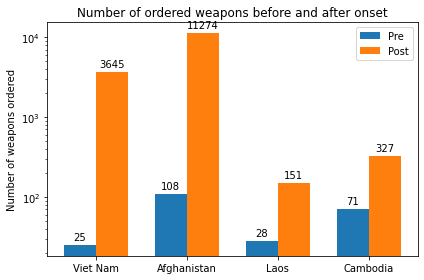

In [9]:
country = ['Viet Nam', 'Afghanistan', 'Laos', 'Cambodia']
onset = [1960, 1978, 1960, 1970]
pre_onset = []
post_onset = []

for c, o in zip(country, onset):
    pre, post = imp_number(trade, c, onset = o, buffer = 5)
    pre_onset.append(pre)
    post_onset.append(post)

labels = country


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_onset, width, label='Pre')
rects2 = ax.bar(x + width/2, post_onset, width, label='Post')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_ylabel('Number of weapons ordered')
ax.set_title('Number of ordered weapons before and after onset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [10]:
import plotly.express as px
import plotly.graph_objects as go

In [25]:
civil_war.year.shape

(117,)

In [32]:
list_countries = ['Viet Nam', 'Afghanistan', 'Laos', 'Cambodia',
                 'Azerbaijan', 'Rwanda']
onset = [1960, 1978, 1960, 1970, 1991, 1990]
pre_data = []
post_data = []

for c, o in zip(list_countries, onset):
    pre, post = imp_number(trade, c, onset=o, buffer=5)
    pre_data.append(pre)
    post_data.append(post)
    

fig = go.Figure(data=[
    go.Bar(name='Pre onset', x = list_countries[0], y=pre_data),
    go.Bar(name='Post onset', x = list_countries[0], y=post_data)
])
#pre, post = imp_number(trade, c, onset = o, buffer = 5)
#fig.add_trace(go.Bar(x=[list_countries[0]], y=[pre]))
fig.update_layout(barmode='group')
fig.update_yaxes(type="log")

fig.update_layout(title='Weapons import in',
               xaxis_title='Country',
               yaxis_title='Weapon import')


button_country = list([dict(
                 args = [{"y": pre_data[k]},[0]],
                 label = list_countries[k],
                 method = "restyle"
                ) for k in range(len(list_countries))])

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            buttons=button_country,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.3,
            xanchor="left",
            y=1.235,
            yanchor="top"
        ),
    ]
)
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'x' property of bar
        Received value: 'Viet Nam'

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series